# Библиотеки

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import cmath
import random

# Генерация первого поколения больных

In [2]:
p = 0.05       #Вероятность заражения
p_d = 0.25      #Вероятность смерти
I = 10         #Количество изначально больных
N = [0]*10000 #Массив особей
n = [0]*10000 #Массив встреч
D = []

In [3]:
r = np.random.randint(0, len(N), I)
for i in range(len(r)):
    for j in range(len(r)):
        if i == j:
            continue
        while r[i] == r[j]:
            r[j] = np.random.randint(len(N))

In [4]:
for i in range(len(r)):
    N[r[i]] = 1

# Смертность без вакцинации

In [5]:
s1 = [0]*100
for i in range(100):                       #Количетсво дней пандемии
    
    n = [0]*len(N)
    D = []
    
    for j in range(len(N)):                #Генерация встреч особей
        
        r = []
        r = np.random.randint(0, len(N), 3) #Генерация особей для встречи
        
        for l in range(len(r)):             #Проверка на встречу с самим собой
            while r[l] == j:
                r[l] = np.random.randint(len(N))
        
        for l in range(len(r)):            #Проверка на повторение особей для встречи
            for m in range(len(r)):
                
                if l == m:
                    continue
                    
                while r[l] == r[m]:
                    r[m] = np.random.randint(len(N))
                    
                    while r[m] == j:
                        r[m] = np.random.randint(len(N))
        
        for l in range(len(r)):            #Проверка на количество встреч
            while n[r[l]] >= 3:
                
                r[l] = np.random.randint(len(N))
                
                while r[l] == j:
                    r[l] = np.random.randint(len(N))
                
                for m in range(len(r)):
                    if l == m:
                        continue
                    while r[l] == r[m]:
                        r[m] = np.random.randint(len(N))
                        
                        while r[m] == j:
                            r[m] = np.random.randint(len(N))
        
        for l in range(len(r)):           #Подсчёт встреч для каждой особи
            n[r[l]] += 1
        
        for k in range(len(r)):           #Проверка на заражение
            
            if N[j] == 0 and 0 < N[r[k]] and N[r[k]] <= 7:
                if random.random() < p:
                    N[j] = 1
                    
            if N[r[k]] == 0 and 0 < N[j] and N[r[k]] <= 7:
                if random.random() < p:
                    N[r[k]] = 1
        
        if 0 < N[j] <= 7:                #Проверка на смерть и подсчёт
            if random.random() < p_d:
                D.append(j)
                
    for m in range(len(D)):
        N.pop(D[m])
        for k in range(len(D)):
            D[k] -= 1
        s1[i] += 1

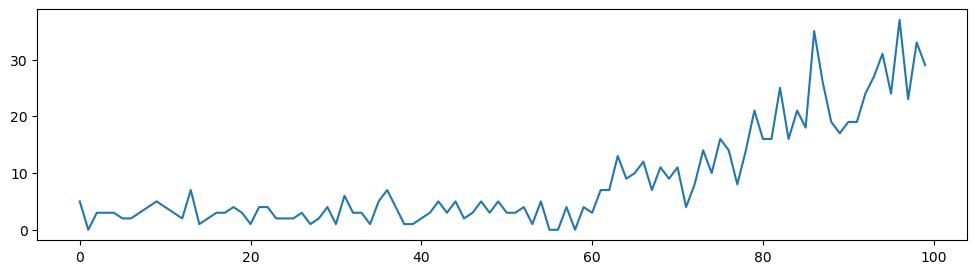

In [6]:
X = list(range(0, 100))
plt.figure(figsize=(12, 3))
plt.plot(X, s1)
plt.show()

In [7]:
Sum = 0
for i in range(len(s1)):
    Sum += s1[i]
Sum

862

# Генерация второго поколения больных

In [8]:
p = 0.05       #Вероятность заражения
p_d = 0.25     #Вероятность смерти
I = 10         #Количество изначально больных
N = [0]*10000 #Массив особей
n = [0]*10000 #Массив встреч
v = [0]*10000 #Массив вакцинации
D = []

In [9]:
r = np.random.randint(0, len(N), I)
for i in range(len(r)):
    for j in range(len(r)):
        if i == j:
            continue
        while r[i] == r[j]:
            r[j] = np.random.randint(len(N))

In [10]:
for i in range(len(r)):
    N[r[i]] = 1

In [11]:
r = np.random.randint(0, len(N), 2500)
for i in range(len(r)):
    for j in range(len(r)):
        if i == j:
            continue
        while r[i] == r[j]:
            r[j] = np.random.randint(len(N))

In [12]:
for i in range(len(r)):
    v[r[i]] = 1

# Смертность при 25% вакцинированных

In [13]:
s2 = [0]*100
for i in range(100):                       #Количетсво дней пандемии
    
    n = [0]*len(N)
    D = []
    
    for j in range(len(N)):                #Генерация встреч особей
        
        r = []
        r = np.random.randint(0, len(N), 3) #Генерация особей для встречи
        
        for l in range(len(r)):             #Проверка на встречу с самим собой
            while r[l] == j:
                r[l] = np.random.randint(len(N))
        
        for l in range(len(r)):            #Проверка на повторение особей для встречи
            for m in range(len(r)):
                
                if l == m:
                    continue
                    
                while r[l] == r[m]:
                    r[m] = np.random.randint(len(N))
                    
                    while r[m] == j:
                        r[m] = np.random.randint(len(N))
        
        for l in range(len(r)):            #Проверка на количество встреч
            while n[r[l]] >= 3:
                
                r[l] = np.random.randint(len(N))
                
                while r[l] == j:
                    r[l] = np.random.randint(len(N))
                
                for m in range(len(r)):
                    if l == m:
                        continue
                    while r[l] == r[m]:
                        r[m] = np.random.randint(len(N))
                        
                        while r[m] == j:
                            r[m] = np.random.randint(len(N))
        
        for l in range(len(r)):           #Подсчёт встреч для каждой особи
            n[r[l]] += 1
        
        for k in range(len(r)):           #Проверка на заражение
            
            if N[j] == 0 and 0 < N[r[k]] and N[r[k]] <= 7:
                if v[j] == 1:
                    if random.random() < p/2:
                        N[j] = 1
                elif random.random() < p:
                    N[j] = 1
                    
            if N[r[k]] == 0 and 0 < N[j] and N[r[k]] <= 7:
                if v[j] == 1:
                    if random.random() < p/2:
                        N[r[k]] = 1
                elif random.random() < p:
                    N[r[k]] = 1
        
        if 0 < N[j] <= 7:                #Проверка на смерть и подсчёт
            if random.random() < p_d:
                D.append(j)
                
    for m in range(len(D)):
        N.pop(D[m])
        v.pop(D[m])
        for k in range(len(D)):
            D[k] -= 1
        s2[i] += 1

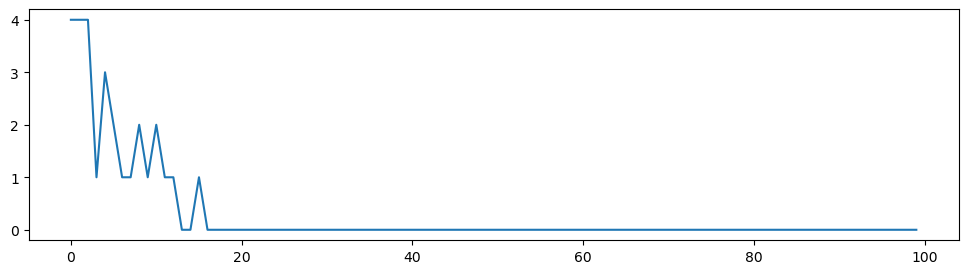

In [14]:
X = list(range(0, 100))
plt.figure(figsize=(12, 3))
plt.plot(X, s2)
plt.show()

In [15]:
Sum = 0
for i in range(len(s2)):
    Sum += s2[i]
Sum

28

# Генерация третьего поколения больных

In [16]:
p = 0.05       #Вероятность заражения
p_d = 0.25     #Вероятность смерти
I = 10         #Количество изначально больных
N = [0]*10000 #Массив особей
n = [0]*10000 #Массив встреч
v = [0]*10000 #Массив вакцинации
D = []

In [17]:
r = np.random.randint(0, len(N), I)
for i in range(len(r)):
    for j in range(len(r)):
        if i == j:
            continue
        while r[i] == r[j]:
            r[j] = np.random.randint(len(N))

In [18]:
for i in range(len(r)):
    N[r[i]] = 1

In [19]:
r = np.random.randint(0, len(N), 5000)
for i in range(len(r)):
    for j in range(len(r)):
        if i == j:
            continue
        while r[i] == r[j]:
            r[j] = np.random.randint(len(N))

In [20]:
for i in range(len(r)):
    v[r[i]] = 1

# Смертность при 50% вакцинированных

In [21]:
s3 = [0]*100
for i in range(100):                       #Количетсво дней пандемии
    
    n = [0]*len(N)
    D = []
    
    for j in range(len(N)):                #Генерация встреч особей
        
        r = []
        r = np.random.randint(0, len(N), 3) #Генерация особей для встречи
        
        for l in range(len(r)):             #Проверка на встречу с самим собой
            while r[l] == j:
                r[l] = np.random.randint(len(N))
        
        for l in range(len(r)):            #Проверка на повторение особей для встречи
            for m in range(len(r)):
                
                if l == m:
                    continue
                    
                while r[l] == r[m]:
                    r[m] = np.random.randint(len(N))
                    
                    while r[m] == j:
                        r[m] = np.random.randint(len(N))
        
        for l in range(len(r)):            #Проверка на количество встреч
            while n[r[l]] >= 3:
                
                r[l] = np.random.randint(len(N))
                
                while r[l] == j:
                    r[l] = np.random.randint(len(N))
                
                for m in range(len(r)):
                    if l == m:
                        continue
                    while r[l] == r[m]:
                        r[m] = np.random.randint(len(N))
                        
                        while r[m] == j:
                            r[m] = np.random.randint(len(N))
        
        for l in range(len(r)):           #Подсчёт встреч для каждой особи
            n[r[l]] += 1
        
        for k in range(len(r)):           #Проверка на заражение
            
            if N[j] == 0 and 0 < N[r[k]] and N[r[k]] <= 7:
                if v[j] == 1:
                    if random.random() < p/2:
                        N[j] = 1
                elif random.random() < p:
                    N[j] = 1
                    
            if N[r[k]] == 0 and 0 < N[j] and N[r[k]] <= 7:
                if v[j] == 1:
                    if random.random() < p/2:
                        N[r[k]] = 1
                elif random.random() < p:
                    N[r[k]] = 1
        
        if 0 < N[j] <= 7:                #Проверка на смерть и подсчёт
            if random.random() < p_d:
                D.append(j)
                
    for m in range(len(D)):
        N.pop(D[m])
        v.pop(D[m])
        for k in range(len(D)):
            D[k] -= 1
        s3[i] += 1

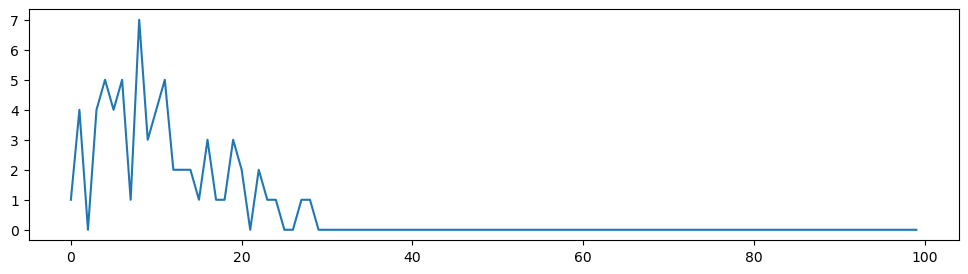

In [22]:
X = list(range(0, 100))
plt.figure(figsize=(12, 3))
plt.plot(X, s3)
plt.show()

In [23]:
Sum = 0
for i in range(len(s3)):
    Sum += s3[i]
Sum

66

# Генерация четвёртого поколения больных

In [24]:
p = 0.05       #Вероятность заражения
p_d = 0.25     #Вероятность смерти
I = 10         #Количество изначально больных
N = [0]*10000 #Массив особей
n = [0]*10000 #Массив встреч
v = [0]*10000 #Массив вакцинации
D = []

In [25]:
r = np.random.randint(0, len(N), I)
for i in range(len(r)):
    for j in range(len(r)):
        if i == j:
            continue
        while r[i] == r[j]:
            r[j] = np.random.randint(len(N))

In [26]:
for i in range(len(r)):
    N[r[i]] = 1

In [27]:
r = np.random.randint(0, len(N), 7500)
for i in range(len(r)):
    for j in range(len(r)):
        if i == j:
            continue
        while r[i] == r[j]:
            r[j] = np.random.randint(len(N))

In [28]:
for i in range(len(r)):
    v[r[i]] = 1

# Смертность при 75% вакцинированных

In [29]:
s4 = [0]*100
for i in range(100):                       #Количетсво дней пандемии
    
    n = [0]*len(N)
    D = []
    
    for j in range(len(N)):                #Генерация встреч особей
        
        r = []
        r = np.random.randint(0, len(N), 3) #Генерация особей для встречи
        
        for l in range(len(r)):             #Проверка на встречу с самим собой
            while r[l] == j:
                r[l] = np.random.randint(len(N))
        
        for l in range(len(r)):            #Проверка на повторение особей для встречи
            for m in range(len(r)):
                
                if l == m:
                    continue
                    
                while r[l] == r[m]:
                    r[m] = np.random.randint(len(N))
                    
                    while r[m] == j:
                        r[m] = np.random.randint(len(N))
        
        for l in range(len(r)):            #Проверка на количество встреч
            while n[r[l]] >= 3:
                
                r[l] = np.random.randint(len(N))
                
                while r[l] == j:
                    r[l] = np.random.randint(len(N))
                
                for m in range(len(r)):
                    if l == m:
                        continue
                    while r[l] == r[m]:
                        r[m] = np.random.randint(len(N))
                        
                        while r[m] == j:
                            r[m] = np.random.randint(len(N))
        
        for l in range(len(r)):           #Подсчёт встреч для каждой особи
            n[r[l]] += 1
        
        for k in range(len(r)):           #Проверка на заражение
            
            if N[j] == 0 and 0 < N[r[k]] and N[r[k]] <= 7:
                if v[j] == 1:
                    if random.random() < p/2:
                        N[j] = 1
                elif random.random() < p:
                    N[j] = 1
                    
            if N[r[k]] == 0 and 0 < N[j] and N[r[k]] <= 7:
                if v[j] == 1:
                    if random.random() < p/2:
                        N[r[k]] = 1
                elif random.random() < p:
                    N[r[k]] = 1
        
        if 0 < N[j] <= 7:                #Проверка на смерть и подсчёт
            if random.random() < p_d:
                D.append(j)
                
    for m in range(len(D)):
        N.pop(D[m])
        v.pop(D[m])
        for k in range(len(D)):
            D[k] -= 1
        s4[i] += 1

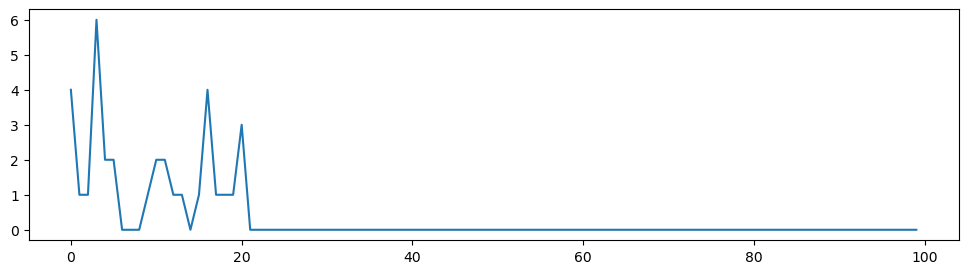

In [30]:
X = list(range(0, 100))
plt.figure(figsize=(12, 3))
plt.plot(X, s4)
plt.show()

In [31]:
Sum = 0
for i in range(len(s4)):
    Sum += s4[i]
Sum

34

# Генерация пятого поколения больных

In [32]:
p = 0.05       #Вероятность заражения
p_d = 0.25      #Вероятность смерти
I = 10         #Количество изначально больных
N = [0]*10000 #Массив особей
n = [0]*10000 #Массив встреч
D = []

In [33]:
r = np.random.randint(0, len(N), I)
for i in range(len(r)):
    for j in range(len(r)):
        if i == j:
            continue
        while r[i] == r[j]:
            r[j] = np.random.randint(len(N))

In [34]:
for i in range(len(r)):
    N[r[i]] = 1

# Смертность при 100% вакцинированных

In [35]:
s5 = [0]*100
for i in range(100):                       #Количетсво дней пандемии
    
    n = [0]*len(N)
    D = []
    
    for j in range(len(N)):                #Генерация встреч особей
        
        r = []
        r = np.random.randint(0, len(N), 3) #Генерация особей для встречи
        
        for l in range(len(r)):             #Проверка на встречу с самим собой
            while r[l] == j:
                r[l] = np.random.randint(len(N))
        
        for l in range(len(r)):            #Проверка на повторение особей для встречи
            for m in range(len(r)):
                
                if l == m:
                    continue
                    
                while r[l] == r[m]:
                    r[m] = np.random.randint(len(N))
                    
                    while r[m] == j:
                        r[m] = np.random.randint(len(N))
        
        for l in range(len(r)):            #Проверка на количество встреч
            while n[r[l]] >= 3:
                
                r[l] = np.random.randint(len(N))
                
                while r[l] == j:
                    r[l] = np.random.randint(len(N))
                
                for m in range(len(r)):
                    if l == m:
                        continue
                    while r[l] == r[m]:
                        r[m] = np.random.randint(len(N))
                        
                        while r[m] == j:
                            r[m] = np.random.randint(len(N))
        
        for l in range(len(r)):           #Подсчёт встреч для каждой особи
            n[r[l]] += 1
        
        for k in range(len(r)):           #Проверка на заражение
            
            if N[j] == 0 and 0 < N[r[k]] and N[r[k]] <= 7:
                if random.random() < p/2:
                    N[j] = 1
                    
            if N[r[k]] == 0 and 0 < N[j] and N[r[k]] <= 7:
                if random.random() < p/2:
                    N[r[k]] = 1
        
        if 0 < N[j] <= 7:                #Проверка на смерть и подсчёт
            if random.random() < p_d:
                D.append(j)
                
    for m in range(len(D)):
        N.pop(D[m])
        for k in range(len(D)):
            D[k] -= 1
        s5[i] += 1

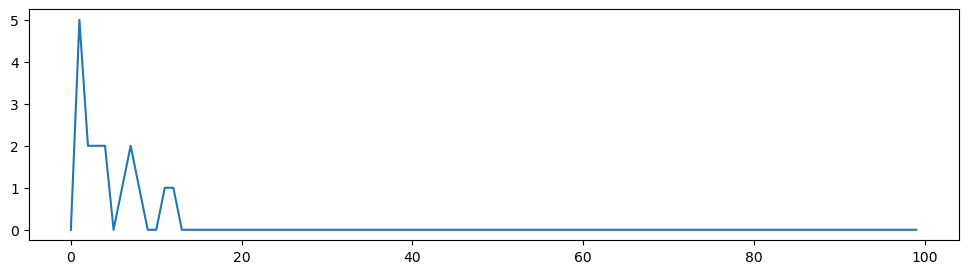

In [36]:
X = list(range(0, 100))
plt.figure(figsize=(12, 3))
plt.plot(X, s5)
plt.show()

In [37]:
Sum = 0
for i in range(len(s5)):
    Sum += s5[i]
Sum

17

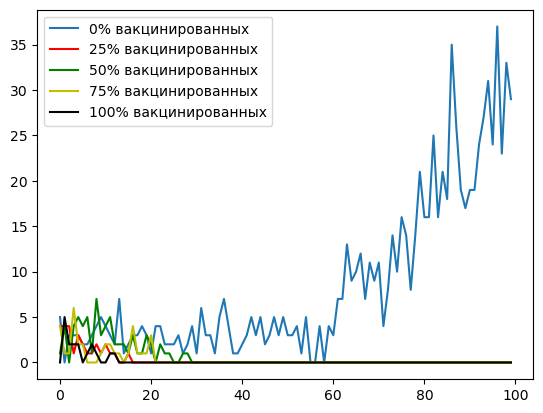

In [38]:
plt.plot(X, s1, X, s2, 'r', X, s3, 'g', X, s4, 'y', X, s5, 'k')
plt.legend(['0% вакцинированных', '25% вакцинированных', '50% вакцинированных', '75% вакцинированных', '100% вакцинированных'])
plt.show()